In [1]:
import logging
from utility import add_project_root_to_path

logging.basicConfig(level=logging.INFO)

add_project_root_to_path()

In [ ]:
from historical_data import get_historical_prices_for_two_assets
from datetime import datetime

stable_coin_symbol = "USDT"
A_symbol = "ETH"
B_symbol = "BTC"
interval = "5m"

start_time = datetime(2022, 11, 10, 12, 0, 0)
end_time = datetime(2024, 11, 10, 12, 0, 0)
historical_prices = get_historical_prices_for_two_assets(
    stable_coin_symbol, A_symbol, B_symbol, interval, start_time, end_time
)

historical_prices

A symbol candles count: 210513
B symbol candles count: 210513
Joined candles count: 210512


,time,price_A,price_B
0,2022-11-10 09:00:00,1215.89,16846.00
1,2022-11-10 09:05:00,1209.52,16763.34
2,2022-11-10 09:10:00,1213.24,16786.23
3,2022-11-10 09:15:00,1211.21,16757.79
4,2022-11-10 09:20:00,1210.65,16803.19
...,...,...,...
210507,2024-11-10 08:40:00,3182.23,78998.00
210508,2024-11-10 08:45:00,3170.84,78920.00
210509,2024-11-10 08:50:00,3180.72,79050.97
210510,2024-11-10 08:55:00,3182.99,79079.99


In [ ]:
# Ищу промежутки различного поведения цены
import numpy as np

historical_prices["log_price_A"] = np.log(historical_prices["price_A"])
historical_prices["log_price_B"] = np.log(historical_prices["price_B"])
historical_prices["log_return_A"] = historical_prices["log_price_A"].diff()
historical_prices["log_return_B"] = historical_prices["log_price_B"].diff()

# Разделение на недельны интервалы
historical_prices.set_index("time", inplace=True)
weekly_data = historical_prices.resample("7D").agg({
    "log_return_A": ["mean", "std"],
    "log_return_B": ["mean", "std"]
}).reset_index()

weekly_data.columns = ["time", "mean_return_A", "volatility_A", "mean_return_B", "volatility_B"]


def classify_behavior(mean_return, mean_return_mean, volatility, volatility_mean):
    if abs(mean_return) < mean_return_mean and volatility >= volatility_mean:
        return "Высокая волатильность вокруг константы"
    elif abs(mean_return) < mean_return_mean and volatility < volatility_mean:
        return "Штиль"
    elif mean_return > 0 and volatility < volatility_mean:
        return "Рост"
    elif mean_return < 0 and volatility < volatility_mean:
        return "Падение"

In [50]:
weekly_data["behavior_A"] = weekly_data.apply(
    lambda row: classify_behavior(row["mean_return_A"], weekly_data["mean_return_A"].mean(), row["volatility_A"], weekly_data["volatility_A"].mean()), axis=1
)

weekly_data["behavior_B"] = weekly_data.apply(
    lambda row: classify_behavior(row["mean_return_B"], weekly_data["mean_return_B"].mean(), row["volatility_B"], weekly_data["volatility_B"].mean()), axis=1
)

In [2]:
from historical_data import get_historical_prices_for_two_assets
from datetime import datetime
import numpy as np

stable_coin_symbol = "USDT"
A_symbol = "ETH"
B_symbol = "BTC"
interval = "5m"

# высокая волатильность вокрг константы
start_time = datetime(2022, 11, 10, 12, 0, 0)
end_time = datetime(2022, 11, 16, 12, 0, 0)
historical_prices_high_vol = get_historical_prices_for_two_assets(
    stable_coin_symbol, A_symbol, B_symbol, interval, start_time, end_time
)
historical_prices_high_vol["log_price_A"] = np.log(historical_prices_high_vol["price_A"])
historical_prices_high_vol["log_price_B"] = np.log(historical_prices_high_vol["price_B"])

# штиль
start_time = datetime(2023, 7, 15, 12, 0, 0)
end_time = datetime(2023, 7, 21, 12, 0, 0)
historical_prices_high_shtil = get_historical_prices_for_two_assets(
    stable_coin_symbol, A_symbol, B_symbol, interval, start_time, end_time
)
historical_prices_high_shtil["log_price_A"] = np.log(historical_prices_high_shtil["price_A"])
historical_prices_high_shtil["log_price_B"] = np.log(historical_prices_high_shtil["price_B"])

# рост
start_time = datetime(2023, 9, 25, 12, 0, 0)
end_time = datetime(2023, 10, 2, 12, 0, 0)
historical_prices_high_rost = get_historical_prices_for_two_assets(
    stable_coin_symbol, A_symbol, B_symbol, interval, start_time, end_time
)
historical_prices_high_rost["log_price_A"] = np.log(historical_prices_high_rost["price_A"])
historical_prices_high_rost["log_price_B"] = np.log(historical_prices_high_rost["price_B"])

# падение
start_time = datetime(2023, 10, 3, 12, 0, 0)
end_time = datetime(2023, 10, 11, 12, 0, 0)
historical_prices_high_padenie = get_historical_prices_for_two_assets(
    stable_coin_symbol, A_symbol, B_symbol, interval, start_time, end_time
)
historical_prices_high_padenie["log_price_A"] = np.log(historical_prices_high_padenie["price_A"])
historical_prices_high_padenie["log_price_B"] = np.log(historical_prices_high_padenie["price_B"])

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


A symbol candles count: 1729
B symbol candles count: 1729
Joined candles count: 1729
A symbol candles count: 1729
B symbol candles count: 1729
Joined candles count: 1729
A symbol candles count: 2017
B symbol candles count: 2017
Joined candles count: 2017
A symbol candles count: 2305
B symbol candles count: 2305
Joined candles count: 2305


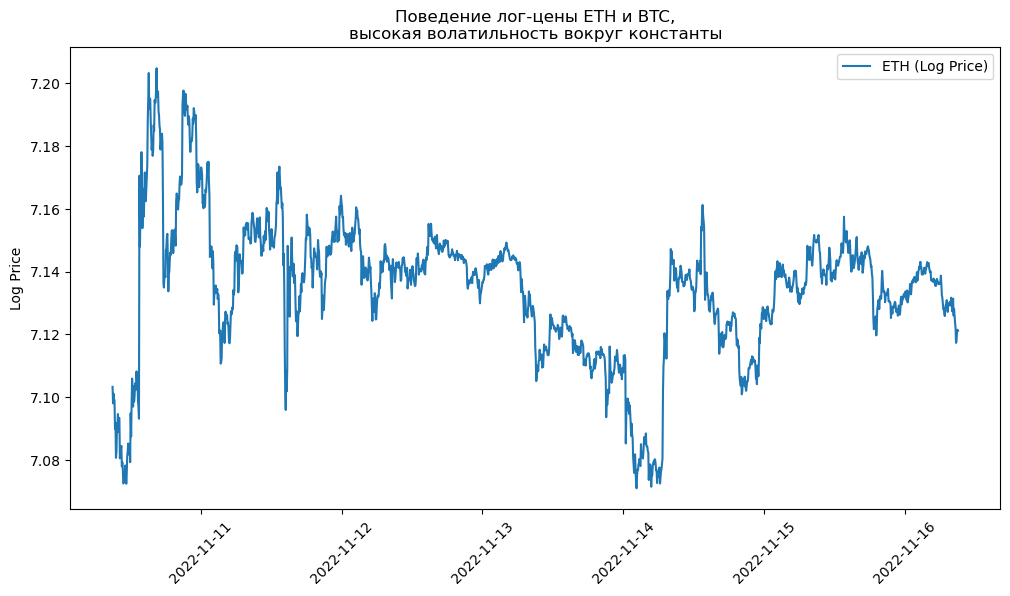

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))
plt.plot(historical_prices_high_vol.time, historical_prices_high_vol["log_price_A"], label="ETH (Log Price)")
# plt.plot(historical_prices_high_vol.time, historical_prices_high_vol["log_price_B"], label="BTC (Log Price)")

plt.ylabel("Log Price")
plt.xticks(rotation=45)

plt.legend()
plt.title("Поведение лог-цены ETH и BTC,\nвысокая волатильность вокруг константы")
plt.show()

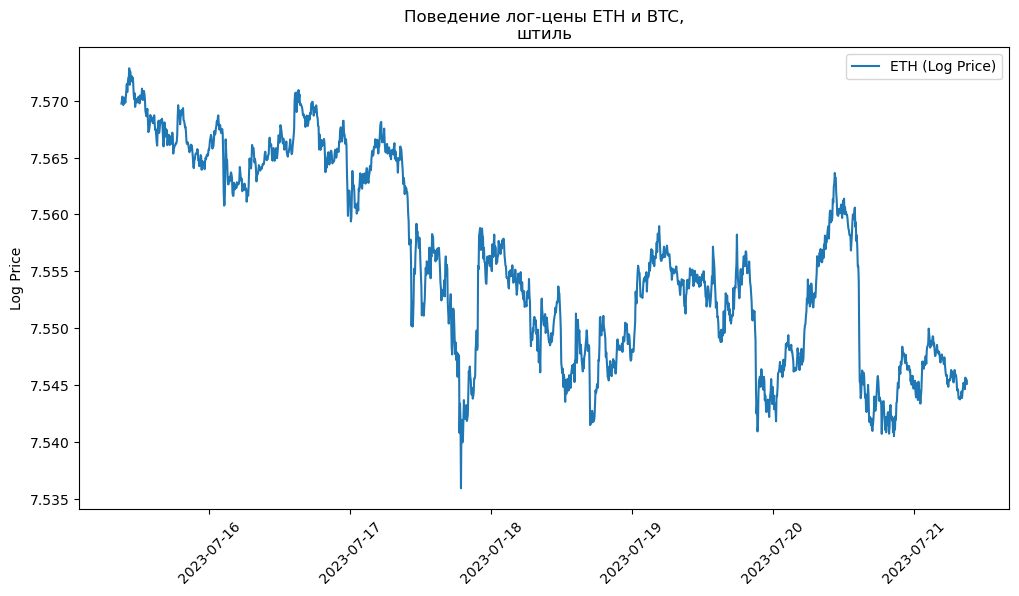

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))
plt.plot(historical_prices_high_shtil.time, historical_prices_high_shtil["log_price_A"], label="ETH (Log Price)")
# plt.plot(historical_prices_high_shtil.time, historical_prices_high_shtil["log_price_B"], label="BTC (Log Price)")

plt.ylabel("Log Price")
plt.xticks(rotation=45)

plt.legend()
plt.title("Поведение лог-цены ETH и BTC,\nштиль")
plt.show()

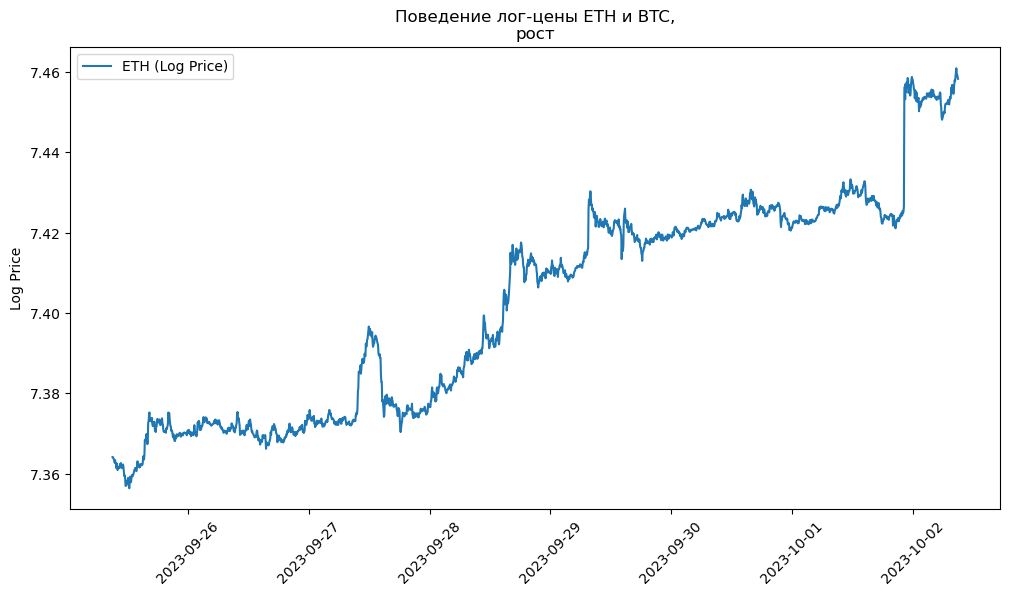

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))
plt.plot(historical_prices_high_rost.time, historical_prices_high_rost["log_price_A"], label="ETH (Log Price)")
# plt.plot(historical_prices_high_rost.time, historical_prices_high_rost["log_price_B"], label="BTC (Log Price)")

plt.ylabel("Log Price")
plt.xticks(rotation=45)

plt.legend()
plt.title("Поведение лог-цены ETH и BTC,\nрост")
plt.show()

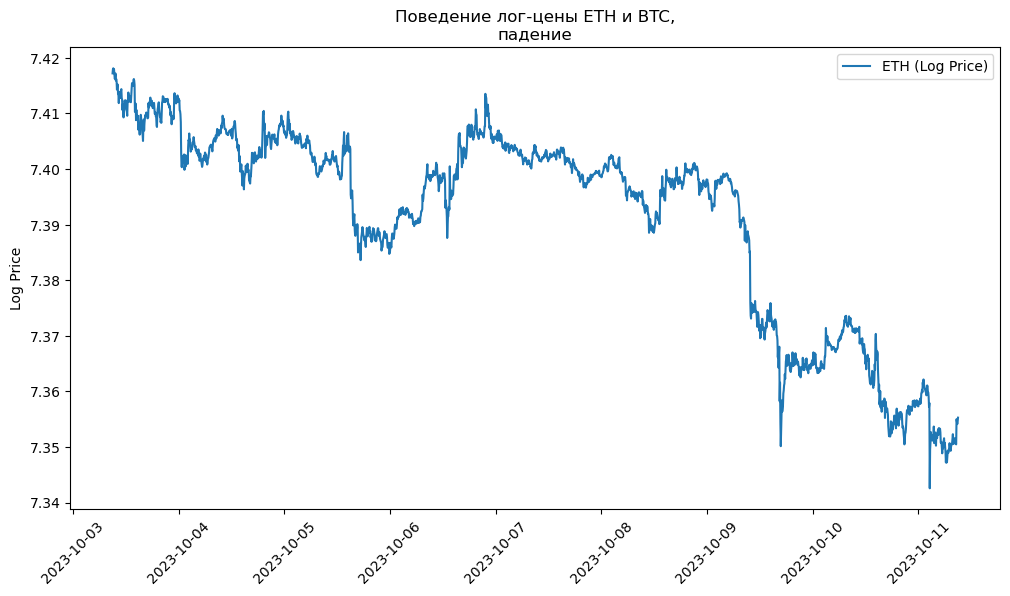

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))
plt.plot(historical_prices_high_padenie.time, historical_prices_high_padenie["log_price_A"], label="ETH (Log Price)")
# plt.plot(historical_prices_high_padenie.time, historical_prices_high_padenie["log_price_B"], label="BTC (Log Price)")

plt.ylabel("Log Price")
plt.xticks(rotation=45)

plt.legend()
plt.title("Поведение лог-цены ETH и BTC,\nпадение")
plt.show()

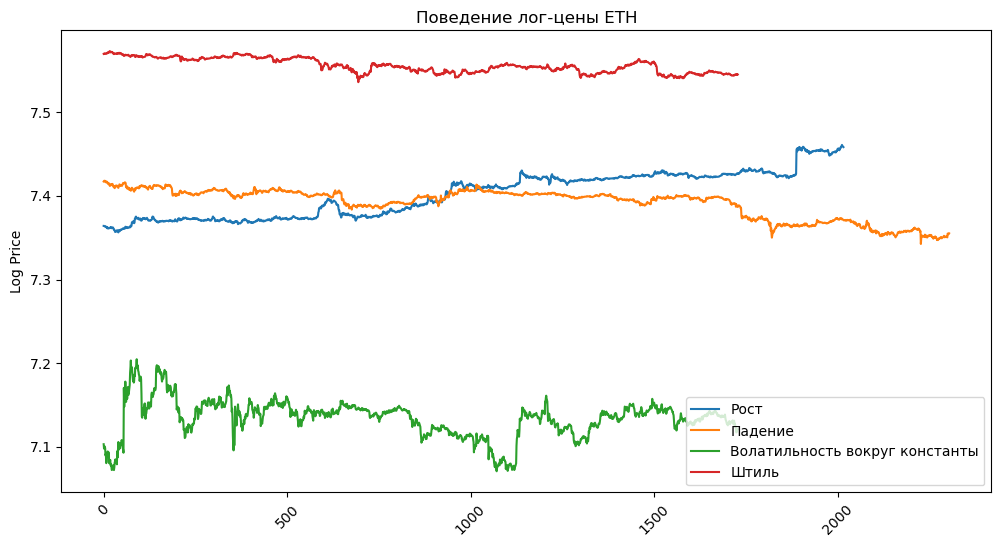

In [96]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(historical_prices_high_rost["log_price_A"])), historical_prices_high_rost["log_price_A"], label="Рост")
plt.plot(range(len(historical_prices_high_padenie["log_price_A"])), historical_prices_high_padenie["log_price_A"], label="Падение")
plt.plot(range(len(historical_prices_high_vol["log_price_A"])), historical_prices_high_vol["log_price_A"], label="Волатильность вокруг константы")
plt.plot(range(len(historical_prices_high_shtil["log_price_A"])), historical_prices_high_shtil["log_price_A"], label="Штиль")

plt.ylabel("Log Price")
plt.xticks(rotation=45)

plt.legend(loc="lower right")
plt.title("Поведение лог-цены ETH")
plt.show()

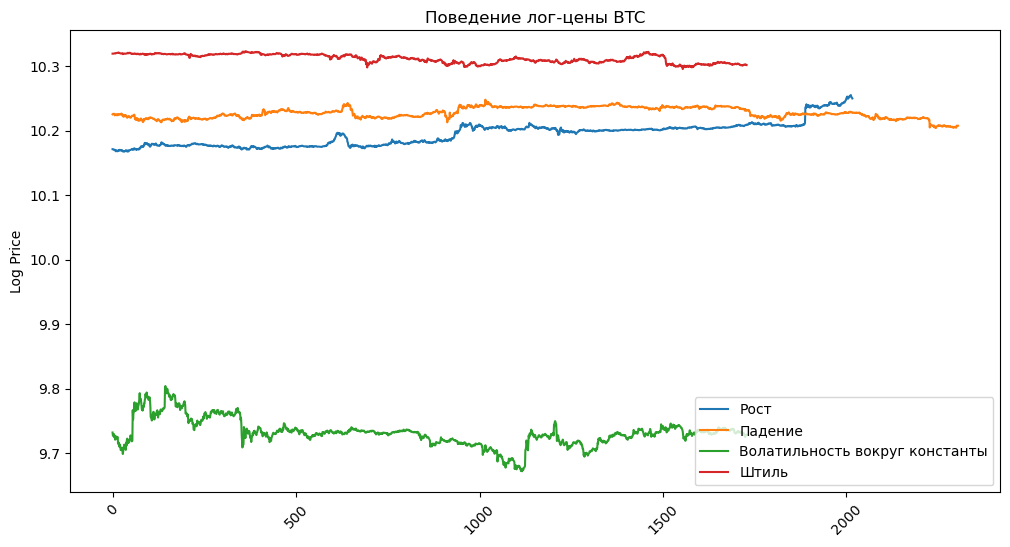

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(historical_prices_high_rost["log_price_B"])), historical_prices_high_rost["log_price_B"], label="Рост")
plt.plot(range(len(historical_prices_high_padenie["log_price_B"])), historical_prices_high_padenie["log_price_B"], label="Падение")
plt.plot(range(len(historical_prices_high_vol["log_price_B"])), historical_prices_high_vol["log_price_B"], label="Волатильность вокруг константы")
plt.plot(range(len(historical_prices_high_shtil["log_price_B"])), historical_prices_high_shtil["log_price_B"], label="Штиль")

plt.ylabel("Log Price")
plt.xticks(rotation=45)

plt.legend(loc="lower right")
plt.title("Поведение лог-цены BTC")
plt.show()

### Симуляция

In [3]:
from user.informed_user import InformedUser
from user.uninformed_user import UninformedUser
from simulation.simulation import Simulation

import numpy as np
from pool.simple_pool import SimplePool
from pool.dynamic_fee_pool import DynamicFeePool
from pool.abstract_pool import PoolLiquidityState

In [4]:
informed_user = InformedUser()
uninformed_user = UninformedUser()
np.random.seed(0)

In [5]:
def get_initial_pool_sizes(price_A: float, price_B: float, total_pool: float) -> tuple:
    '''
    Returns the initial pool sizes for the two assets given the prices of the two assets
    '''
    r = price_A / price_B
    q_A = total_pool / (r + 1)
    q_B = total_pool - q_A
    return q_A, q_B

In [6]:
def sumilat_dynamic_fee(historical_prices):
    
    initial_quantity_A, initial_quantity_B = get_initial_pool_sizes(
        historical_prices["price_A"].iloc[0], historical_prices["price_B"].iloc[0], 100000
    )

    print(f"Initial quantity of A: {initial_quantity_A}, Initial quantity of B: {initial_quantity_B}")

    pool = DynamicFeePool(
        liquidity_state=PoolLiquidityState(
            quantity_a=initial_quantity_A,
            quantity_b=initial_quantity_B
        ),
        alpha=0.001,
        gamma=0.001,
    )

    simulation = Simulation(
        pool=pool,
        network_fee=0,
    )

    simulation_result = simulation.simulate(
        p_UU=0.5,
        informed_user=informed_user,
        uninformed_user=uninformed_user,
        prices=historical_prices,
        isDynamicFee=True,
    )
    return simulation_result

def sumilat_simple_fee(historical_prices):

    initial_quantity_A, initial_quantity_B = get_initial_pool_sizes(
        historical_prices["price_A"].iloc[0], historical_prices["price_B"].iloc[0], 100000
    )

    pool = SimplePool(
        liquidity_state=PoolLiquidityState(
            quantity_a=initial_quantity_A,
            quantity_b=initial_quantity_B
        ),
        alpha=0.001,
    )

    np.random.seed(0)

    simulation = Simulation(
        pool=pool,
        network_fee=0,
    )

    simulation_result = simulation.simulate(
        p_UU=0.5,
        informed_user=informed_user,
        uninformed_user=uninformed_user,
        prices=historical_prices,
        isDynamicFee=False,
    )
    return simulation_result

In [18]:
res_d_vol = sumilat_dynamic_fee(historical_prices_high_vol)
res_s_vol = sumilat_simple_fee(historical_prices_high_vol)

res_d_shtil = sumilat_dynamic_fee(historical_prices_high_shtil)
res_s_shtil = sumilat_simple_fee(historical_prices_high_shtil)

res_d_rost = sumilat_dynamic_fee(historical_prices_high_rost)
res_s_rost = sumilat_simple_fee(historical_prices_high_rost)

res_d_padenie = sumilat_dynamic_fee(historical_prices_high_padenie)
res_s_padenie = sumilat_simple_fee(historical_prices_high_padenie)

Initial quantity of A: 93268.2017219682, Initial quantity of B: 6731.798278031798
Initial quantity of A: 93989.6152019356, Initial quantity of B: 6010.384798064406
Initial quantity of A: 94306.23583674405, Initial quantity of B: 5693.7641632559535
Initial quantity of A: 94311.66334922788, Initial quantity of B: 5688.336650772122


In [8]:
# Plot all participants' profits
import seaborn as sns
import matplotlib.pyplot as plt
from simulation.simulation import UserType, SimulationResult

def extract_user_markouts(
    simulation_result: SimulationResult, user_type: UserType
) -> list:
    res = []
    for snapshot in simulation_result.snapshots:
        res.append(snapshot.user_states[user_type].total_markout)
    return res
        
def extract_lp_markouts(simulation_result: SimulationResult) -> list:
    res = []
    for snapshot in simulation_result.snapshots:
        res.append(snapshot.lp_state.total_markout)
    return res

def plot_results(res_d, res_s, behavior):
    fig, ax = plt.subplots(figsize=(10, 6))

    sns.lineplot(
        x=res_s.timestamps,
        y=extract_user_markouts(res_s, UserType.INFORMED),
        ax=ax,
        label="Informed User",
    )
    sns.lineplot(
        x=res_d.timestamps,
        y=extract_user_markouts(res_d, UserType.INFORMED),
        ax=ax,
        label="Informed User, dynamic fee",
    )

    sns.lineplot(
        x=res_s.timestamps,
        y=extract_user_markouts(res_s, UserType.UNINFORMED),
        ax=ax,
        label="Uninformed User",
    )
    sns.lineplot(
        x=res_d.timestamps,
        y=extract_user_markouts(res_d, UserType.UNINFORMED),
        ax=ax,
        label="Uninformed User, dynamic fee",
    )


    sns.lineplot(
        x=res_s.timestamps,
        y=extract_lp_markouts(res_s),
        ax=ax,
        label="Liquidity Provider",
    )
    sns.lineplot(
        x=res_d.timestamps,
        y=extract_lp_markouts(res_d),
        ax=ax,
        label="Liquidity Provider, dynamic fee",
    )

    plt.xlabel("Time")
    plt.ylabel("Profit")

    plt.xticks(rotation=45)

    plt.title("Markouts of market participants,\n " + behavior)

    plt.show()

def plot_results_diff(res_d, res_s, behavior):
    delta_simple = np.array(extract_user_markouts(res_s, UserType.INFORMED)) - np.array(extract_lp_markouts(res_s))
    delta_dynamic = np.array(extract_user_markouts(res_d, UserType.INFORMED)) - np.array(extract_lp_markouts(res_d))

    fig, ax = plt.subplots(figsize=(10, 6))

    sns.lineplot(
        x=res_s.timestamps,
        y=delta_simple,
        ax=ax,
        label="Simple Algorithm",
    )

    sns.lineplot(
        x=res_d.timestamps,
        y=delta_dynamic,
        ax=ax,
        label="Dynamic Fee Algorithm",
    )

    plt.xlabel("Time")
    plt.ylabel("Delta Profit")
    plt.xticks(rotation=45)

    plt.title("Difference between IU and LP profits,\n " + behavior)

    plt.show()

def plot_results_diff_diff(res_d, res_s, behavior):
    delta_simple = np.array(extract_user_markouts(res_s, UserType.INFORMED)) - np.array(extract_lp_markouts(res_s))
    delta_dynamic = np.array(extract_user_markouts(res_d, UserType.INFORMED)) - np.array(extract_lp_markouts(res_d))

    fig, ax = plt.subplots(figsize=(10, 6))

    sns.lineplot(
        x=res_s.timestamps,
        y=delta_simple-delta_dynamic,
        ax=ax,
    )

    plt.xlabel("Time")
    plt.ylabel("Delta Profit")
    plt.xticks(rotation=45)

    plt.title("The gap between difference between IU and LP profits,\n " + behavior)

    plt.show()

### Результаты для случая "волатильность вокруг константы"

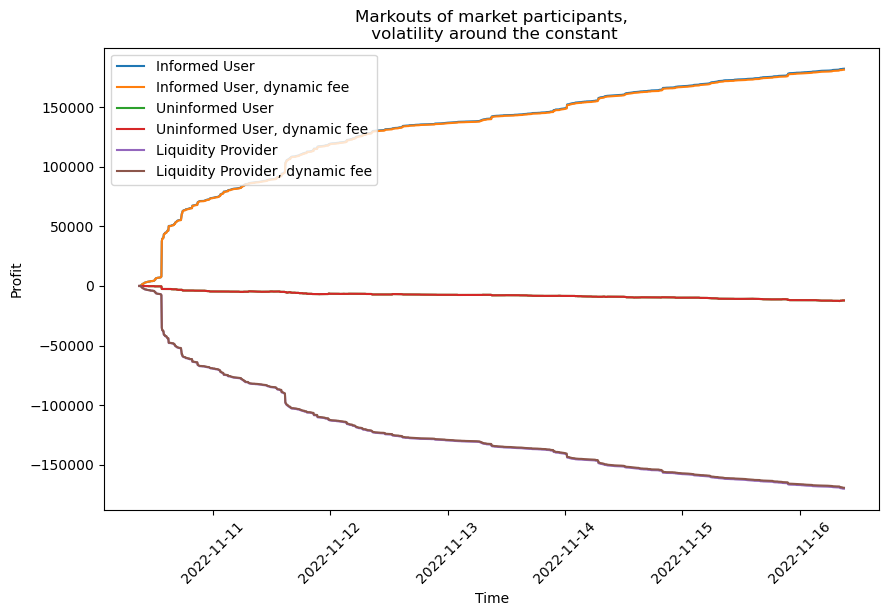

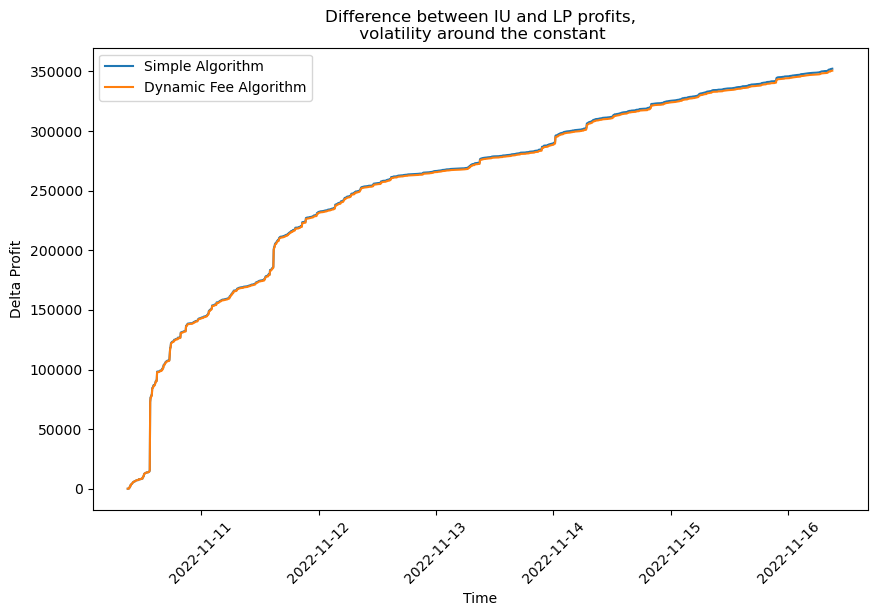

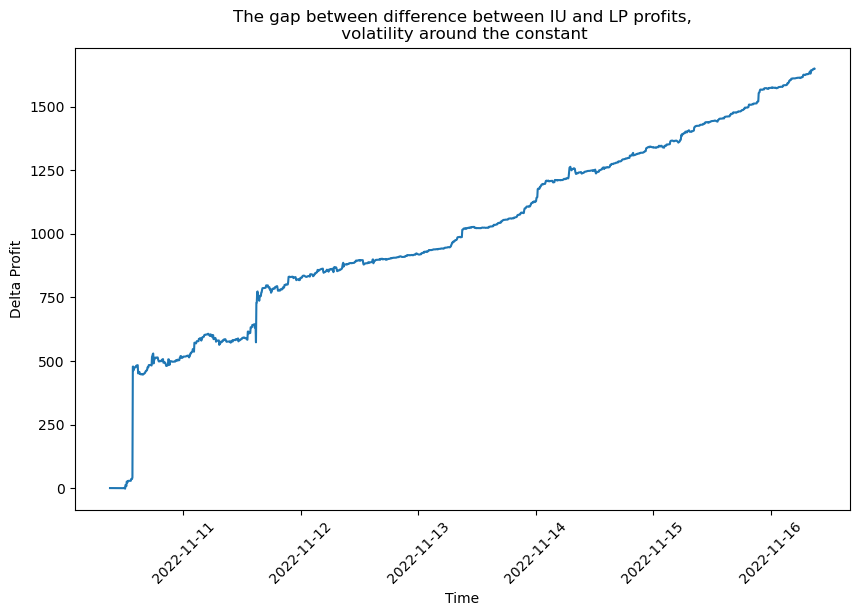

In [112]:
plot_results(res_d_vol, res_s_vol, 'volatility around the constant')
plot_results_diff(res_d_vol, res_s_vol, 'volatility around the constant')
plot_results_diff_diff(res_d_vol, res_s_vol, 'volatility around the constant')

### Результаты для случая "штиль"

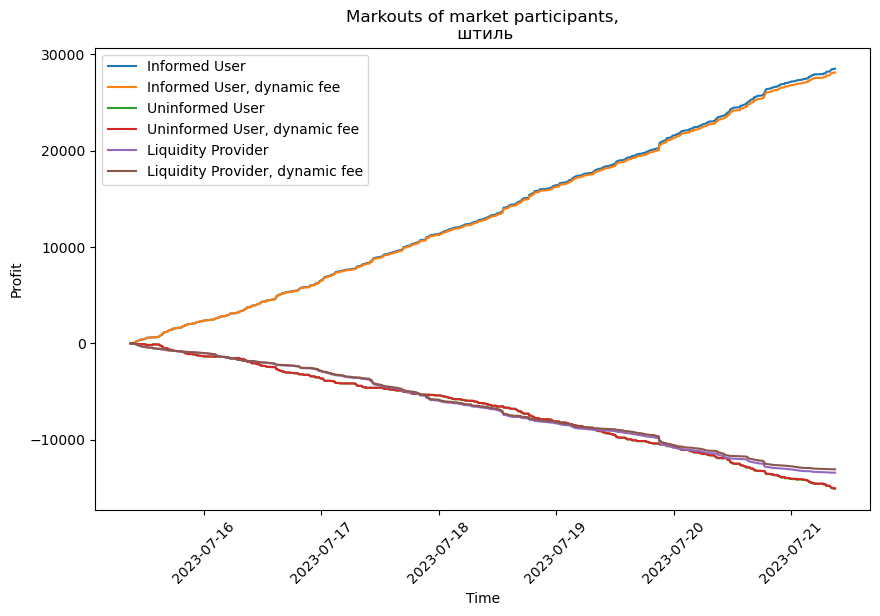

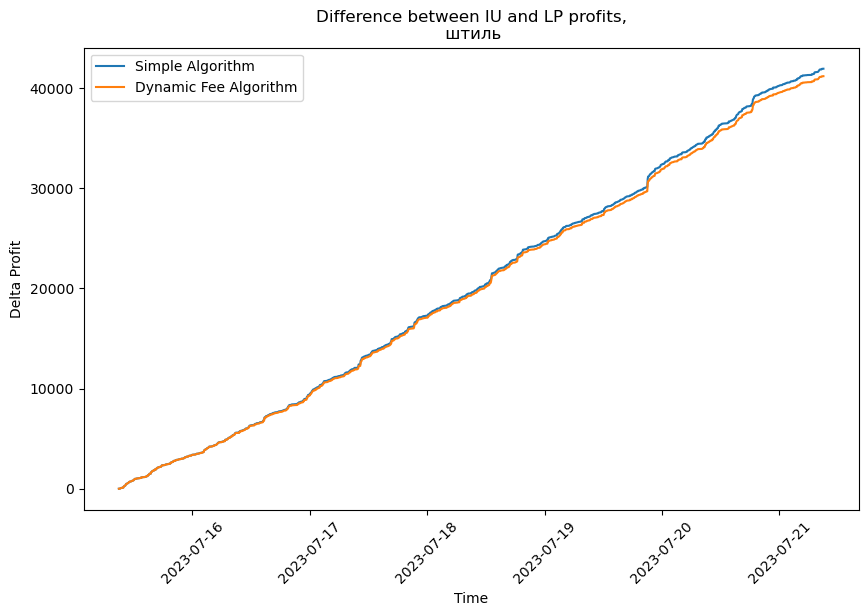

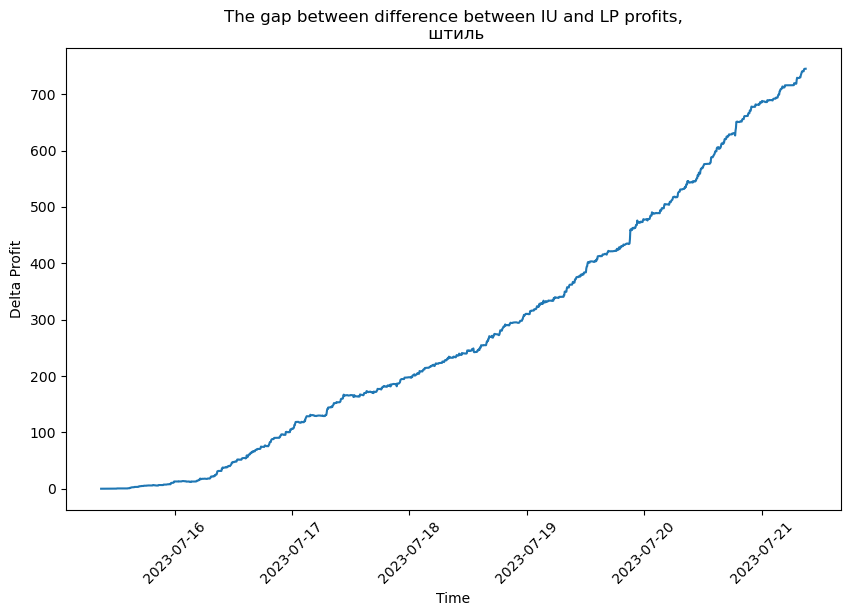

In [9]:
plot_results(res_d_shtil, res_s_shtil, 'штиль')
plot_results_diff(res_d_shtil, res_s_shtil, 'штиль')
plot_results_diff_diff(res_d_shtil, res_s_shtil, 'штиль')

### Результаты для случая "рост"

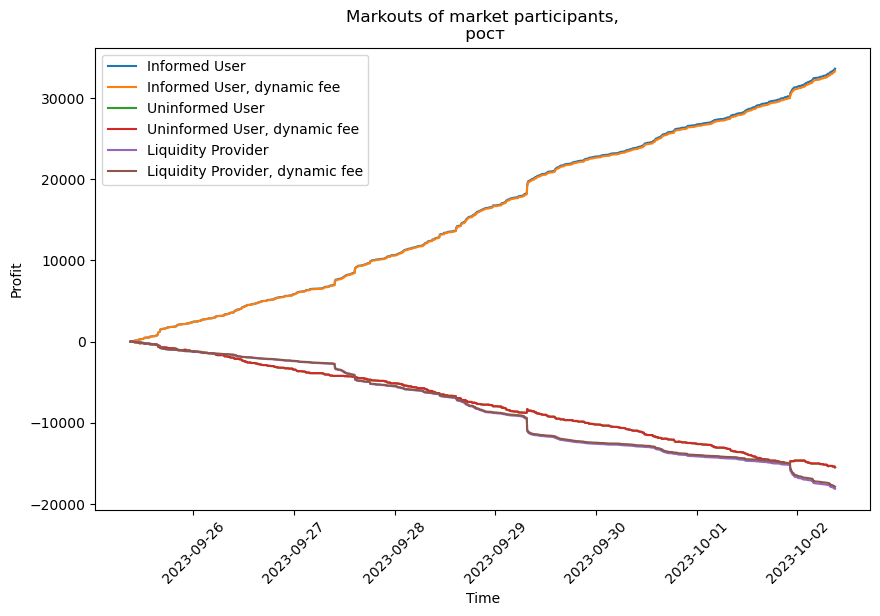

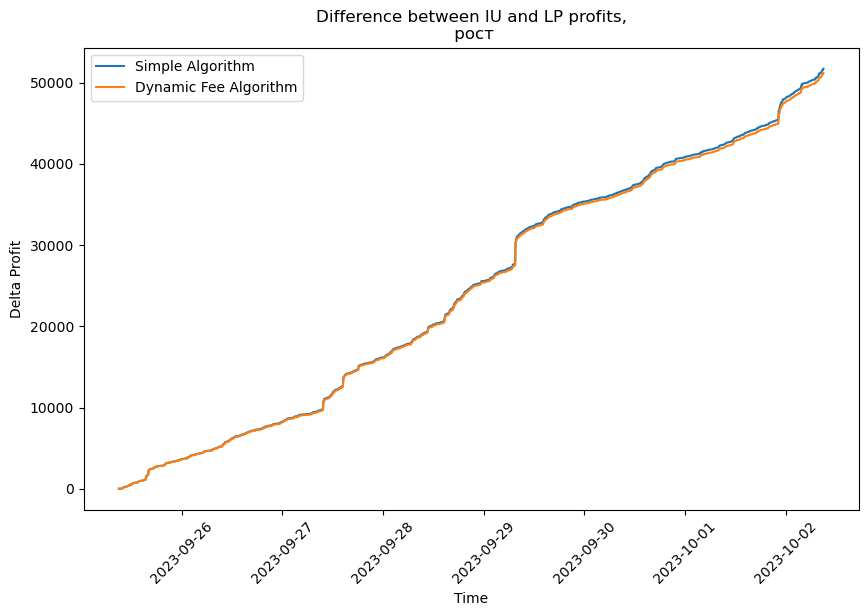

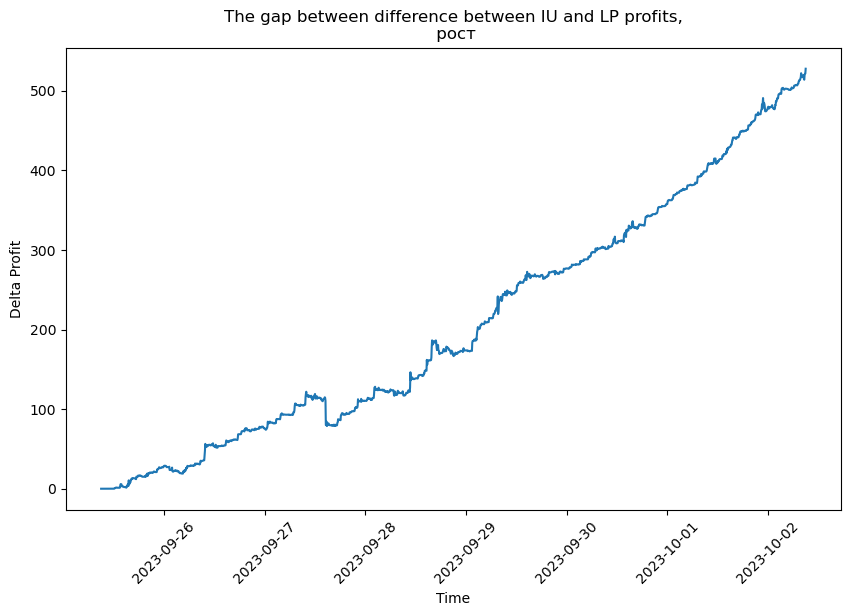

In [115]:
plot_results(res_d_rost, res_s_rost, 'рост')
plot_results_diff(res_d_rost, res_s_rost, 'рост')
plot_results_diff_diff(res_d_rost, res_s_rost, 'рост')

### Результаты для случая "падение"

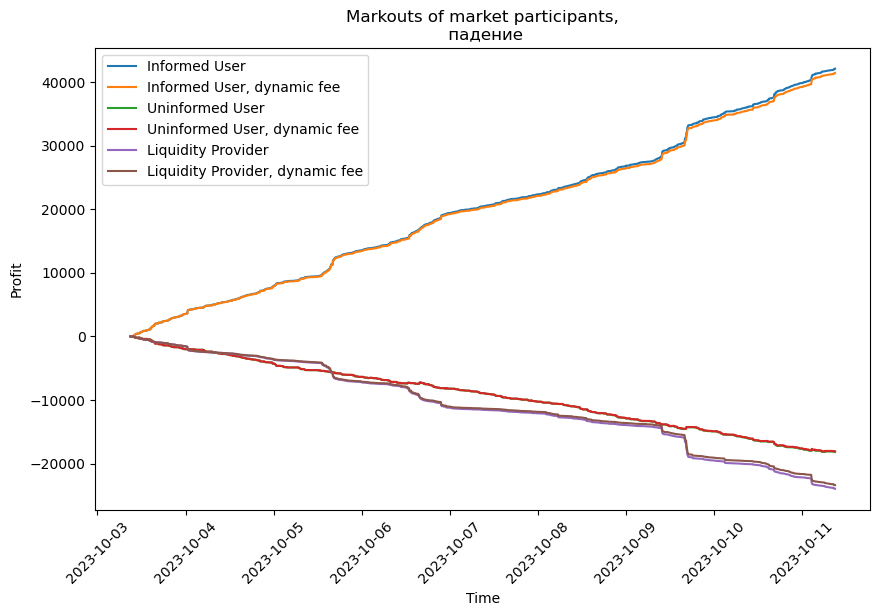

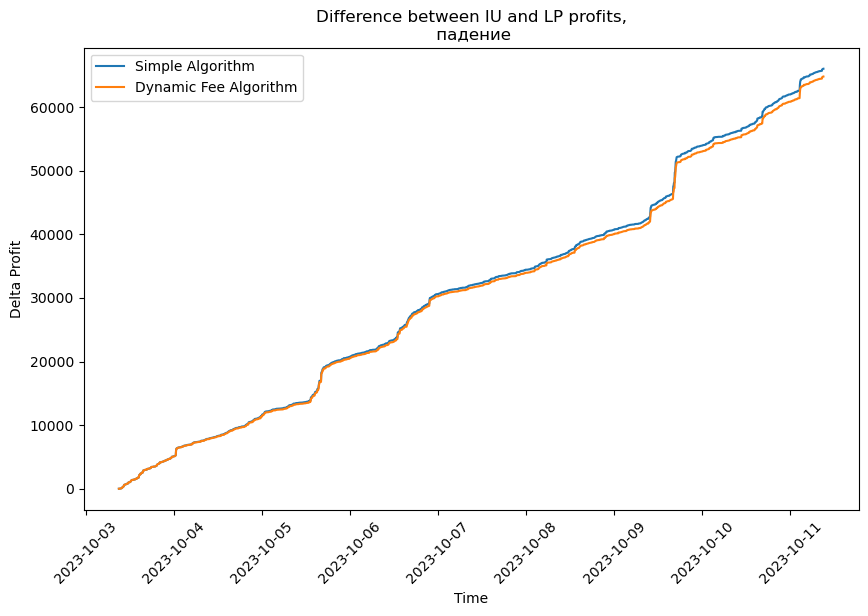

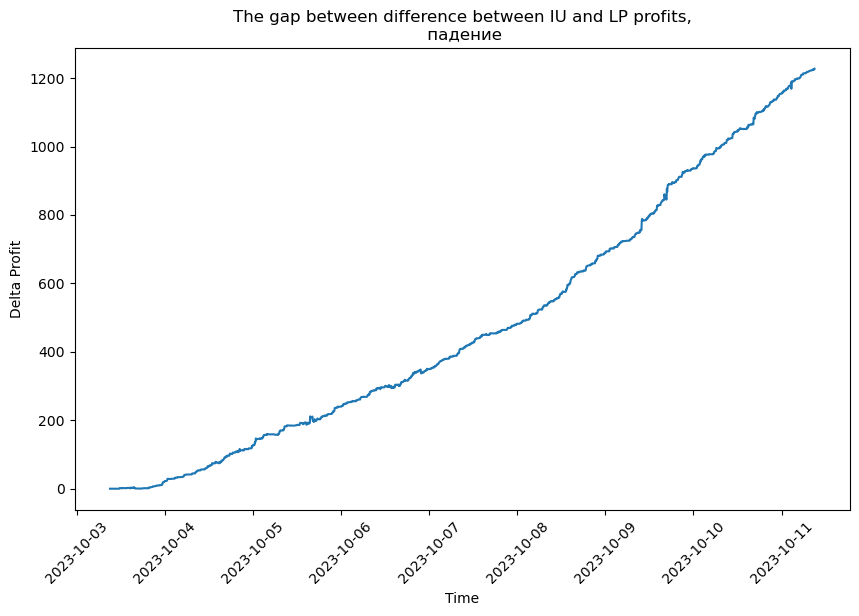

In [116]:
plot_results(res_d_padenie, res_s_padenie, 'падение')
plot_results_diff(res_d_padenie, res_s_padenie, 'падение')
plot_results_diff_diff(res_d_padenie, res_s_padenie, 'падение')

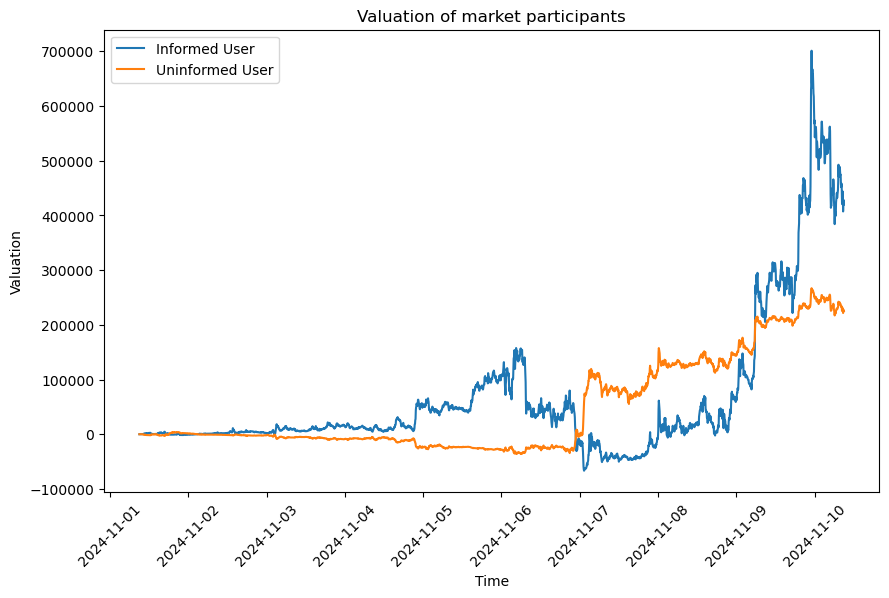

In [14]:
def extract_user_valuations(
    simulation_result: SimulationResult, user_type: UserType
) -> list:
    res = []
    for snapshot in simulation_result.snapshots:
        res.append(snapshot.user_states[user_type].valuation)
    return res
        

fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(
    x=simulation_result.timestamps,
    y=extract_user_valuations(simulation_result, UserType.INFORMED),
    ax=ax,
    label="Informed User",
)

sns.lineplot(
    x=simulation_result.timestamps,
    y=extract_user_valuations(simulation_result, UserType.UNINFORMED),
    ax=ax,
    label="Uninformed User",
)

plt.xlabel("Time")
plt.ylabel("Valuation")


plt.xticks(rotation=45)

plt.title("Valuation of market participants")

plt.show()

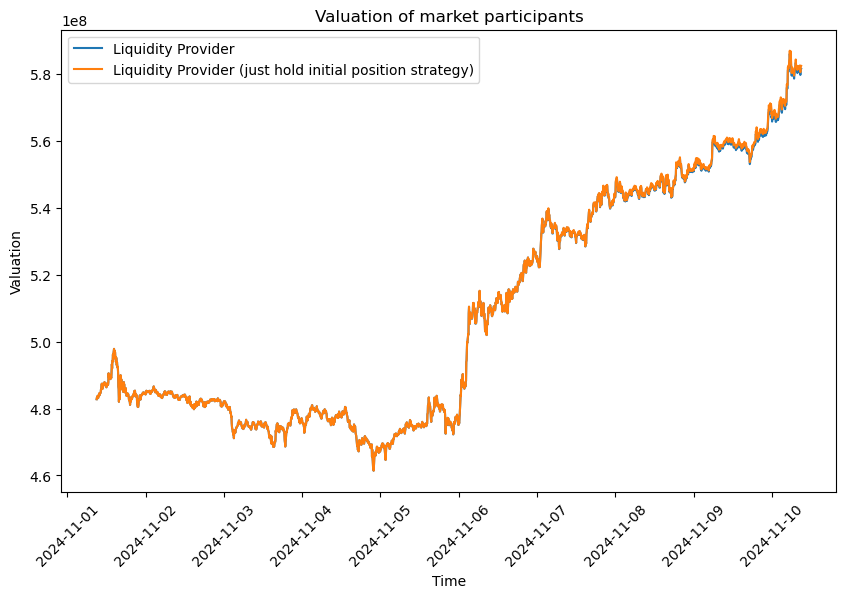

In [14]:
def extract_lp_valuations(
    simulation_result: SimulationResult
) -> list:
    res = []
    for snapshot in simulation_result.snapshots:
        res.append(snapshot.lp_state.valuation)
    return res

def extract_lp_only_hold_valuations(
    simulation_result: SimulationResult
) -> list:
    res = []
    for snapshot in simulation_result.snapshots:
        res.append(snapshot.lp_with_just_hold_strategy.valuation)
    return res

fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(
    x=simulation_result.timestamps,
    y=extract_lp_valuations(simulation_result),
    ax=ax,
    label="Liquidity Provider",
)

sns.lineplot(
    x=simulation_result.timestamps,
    y=extract_lp_only_hold_valuations(simulation_result),
    ax=ax,
    label="Liquidity Provider (just hold initial position strategy)",
)

plt.xlabel("Time")
plt.ylabel("Valuation")

plt.xticks(rotation=45)

plt.title("Valuation of market participants")

plt.show()

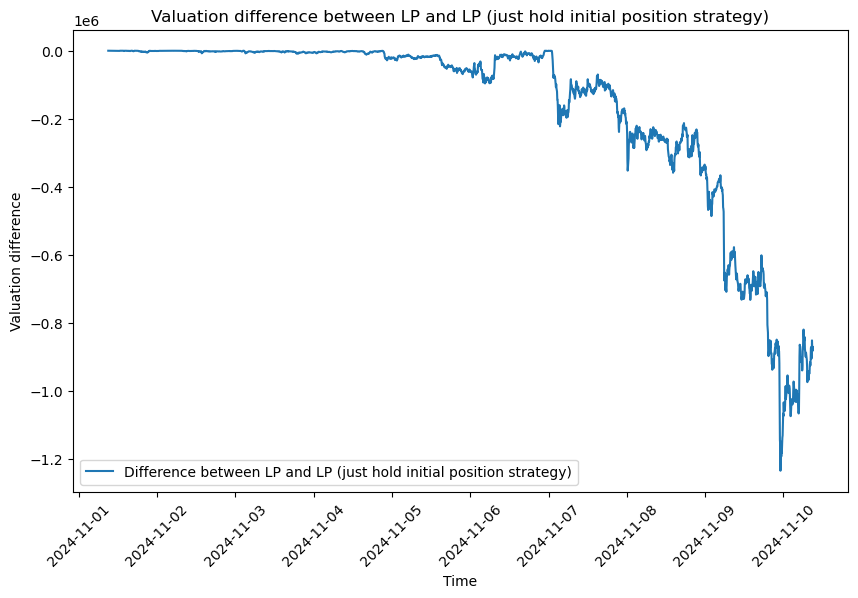

In [15]:
# Plot difference between two lp strategies

lp_valuations_diff = np.array(extract_lp_valuations(simulation_result)) - np.array(extract_lp_only_hold_valuations(simulation_result))

fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(
    x=simulation_result.timestamps,
    y=lp_valuations_diff,
    ax=ax,
    label="Difference between LP and LP (just hold initial position strategy)",
)

plt.xlabel("Time")
plt.ylabel("Valuation difference")

plt.xticks(rotation=45)

plt.title("Valuation difference between LP and LP (just hold initial position strategy)")

plt.show()